In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

In [2]:
def paint(d):
    df = d.copy().reset_index()
    plt.figure(figsize=(12, 3))
    colors = ["brown", "red", "purple", "green", "blue"]
    for i in range(len(df)):
        plt.scatter(i, df.loc[i, "X"], color=colors[df.loc[i, "y"]-1], marker='.')
    plt.show()

In [3]:
df = pd.read_csv("data.csv", index_col=0)
df.rename(columns={"yts": "X", "rampID": "y"}, inplace=True)

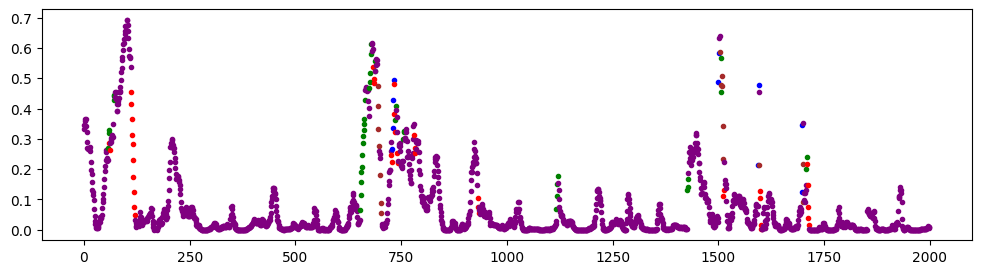

In [5]:
paint(df[-2000:])

The problem consist in, given the class of the preceeding samples, until the last change of class, what the class of the current sample is. As an example, given the following example:

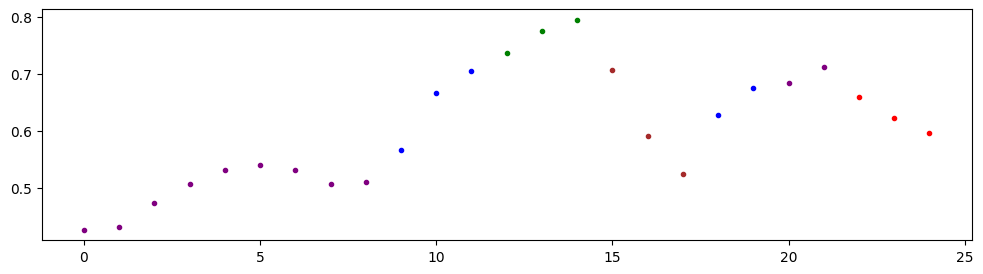

In [45]:
paint(df[25:50])

if we had to classify the first red dot as red, we could only rely on the class of the preceeding purple and blue ones. We can use the absolute power, as well as the classes as described above.

## Random approach
We propose first a random approach, based only on the power value.

In [166]:
def build_dataset(d, history_size):
    df = d.copy().reset_index()
    X = []
    y = []
    for i in range(0, len(df)-history_size):
        X.append(df.loc[i:i+history_size, "y"])
        y.append(df.loc[i+history_size, "y"])
    return np.array(X), np.array(y)

In [167]:
X, Y = build_dataset(df, 4)
X_train, X_test, Y_train, Y_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):], Y[:int(0.8*len(X))], Y[int(0.8*len(X)):]

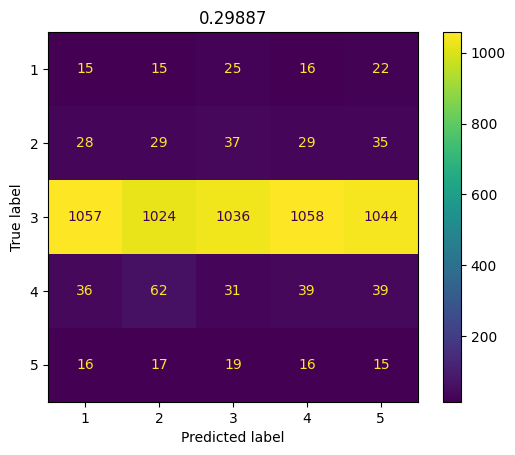

In [168]:
y_hat = np.random.randint(1, 6, size=Y_test.shape)
ConfusionMatrixDisplay.from_predictions(Y_test, y_hat)
plt.title(f"%.5f"%f1_score(Y_test, y_hat, average="weighted"))
plt.show()

In [169]:
balances = np.histogram(Y_train, bins=5)[0]
class_weights = {}
for i in range(1, 6):
    class_weights[i] = (max(balances)/balances[i-1])

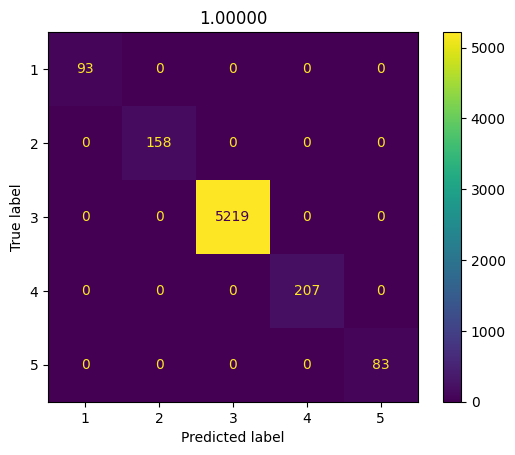

In [170]:
from sklearn.ensemble import RandomForestClassifier
y_hat = RandomForestClassifier(n_jobs=-1, class_weight="balanced").fit(X_train, Y_train).predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test, y_hat)
plt.title(f"%.5f"%f1_score(Y_test, y_hat, average="weighted"))
plt.show()

## Ideas:
- Use the $n$ last ended events described as (length, class) as input features
- Forecast a mixture of this and raw features
- Add statistical features
- Use a metric which does not take the class 3 into account
- Balance the dataset after the window splitting